### We First load the dataset and set the parameters to the model. For this experiment we are using DNN.

In [12]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
import numpy as np
import pandas as pd


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
### DNN Regression
print('---------------------------------------------------------------------------------')
print('Initializing DNN program')
print('---------------------------------------------------------------------------------')
print('')
#---------------------------------------------------------------------
# Importing Libraries

print('---------------------------------------------------------------------------------')
print('Importing Libraries')
print('---------------------------------------------------------------------------------')
print('')

import time
import sklearn
import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
#import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#from keras.callbacks import EarlyStopping
#from keras.preprocessing import sequence
#from keras.utils import pad_sequences
#from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import shap
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
np.random.seed(0)

#---------------------------------------------------------------------
# Defining metric equations

print('---------------------------------------------------------------------------------')
print('Defining Metric Equations')
print('---------------------------------------------------------------------------------')
print('')

def ACC(TP,TN,FP,FN):
    Acc = (TP+TN)/(TP+FP+FN+TN)
    return Acc
def ACC_2 (TP, FN):
    ac = (TP/(TP+FN))
    return ac
def PRECISION(TP,FP):
    Precision = TP/(TP+FP)
    return Precision
def RECALL(TP,FN):
    Recall = TP/(TP+FN)
    return Recall
def F1(Recall, Precision):
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return F1
def BACC(TP,TN,FP,FN):
    BACC =(TP/(TP+FN)+ TN/(TN+FP))*0.5
    return BACC
def MCC(TP,TN,FP,FN):
    MCC = (TN*TP-FN*FP)/(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**.5)
    return MCC
def AUC_ROC(y_test_bin,y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    auc_avg = 0
    counting = 0
    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
     # plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
      #print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))
      auc_avg += auc(fpr[i], tpr[i])
      counting = i+1
    return auc_avg/counting
#---------------------------------------------------------------------
# Defining features of interest
print('---------------------------------------------------------------------------------')
print('Defining features of interest')
print('---------------------------------------------------------------------------------')
print('')

req_cols = ['FLOW_DURATION_MILLISECONDS','FIRST_SWITCHED',
            'TOTAL_FLOWS_EXP','TCP_WIN_MSS_IN','LAST_SWITCHED',
            'TCP_WIN_MAX_IN','TCP_WIN_MIN_IN','TCP_WIN_MIN_OUT',
           'PROTOCOL','TCP_WIN_MAX_OUT','TCP_FLAGS',
            'TCP_WIN_SCALE_OUT','TCP_WIN_SCALE_IN','SRC_TOS',
            'DST_TOS','FLOW_ID','L4_SRC_PORT','L4_DST_PORT',
           'MIN_IP_PKT_LEN','MAX_IP_PKT_LEN','TOTAL_PKTS_EXP',
           'TOTAL_BYTES_EXP','IN_BYTES','IN_PKTS','OUT_BYTES','OUT_PKTS',
            'ALERT']

    # feature_selection =  [ 
    #     'TCP_WIN_SCALE_IN', 
    #     'TCP_WIN_MIN_IN', 
    #     'TCP_WIN_MAX_IN', 
    #     'TCP_WIN_MSS_IN', 
    #     'TCP_FLAGS',
    #     'PROTOCOL', 
    #     'FLOW_DURATION_MILLISECONDS', 
    #     # 'TCP_WIN_MAX_OUT', 
    #     'TCP_WIN_MIN_OUT', 
    #     # 'SRC_TOS', 
    #     # 'DST_TOS',
    #     'Label' 
    #     ]
#---------------------------------------------------------------------
#Load Databases from csv file
address = '/home/oarreche@ads.iu.edu/HITL/sensor/sensor_db'
print('Loading Database')
print('--------------------------------------------------')

fraction = 0.1
fraction2 = 0.01

#Denial of Service
df0 = pd.read_csv (address + '/dos-03-15-2022-15-44-32.csv', usecols=req_cols).sample(frac = fraction)
df1 = pd.read_csv (address + '/dos-03-16-2022-13-45-18.csv', usecols=req_cols).sample(frac = fraction)
df2 = pd.read_csv (address + '/dos-03-17-2022-16-22-53.csv', usecols=req_cols).sample(frac = fraction)
df3 = pd.read_csv (address + '/dos-03-18-2022-19-27-05.csv', usecols=req_cols).sample(frac = fraction)
df4 = pd.read_csv (address + '/dos-03-19-2022-20-01-53.csv', usecols=req_cols).sample(frac = fraction)
df5 = pd.read_csv (address + '/dos-03-20-2022-14-27-54.csv', usecols=req_cols).sample(frac = fraction)


#Malware
#df6 = pd.read_csv ('sensor_db/malware-03-25-2022-17-57-07.csv', usecols=req_cols)

#Normal
df7 = pd.read_csv  (address + '/normal-03-15-2022-15-43-44.csv', usecols=req_cols).sample(frac = fraction2)
df8 = pd.read_csv  (address + '/normal-03-16-2022-13-44-27.csv', usecols=req_cols).sample(frac = fraction2)
df9 = pd.read_csv  (address + '/normal-03-17-2022-16-21-30.csv', usecols=req_cols).sample(frac = fraction2)
df10 = pd.read_csv (address + '/normal-03-18-2022-19-17-31.csv', usecols=req_cols).sample(frac = fraction2)
df11 = pd.read_csv (address + '/normal-03-18-2022-19-25-48.csv', usecols=req_cols).sample(frac = fraction2)
df12 = pd.read_csv (address + '/normal-03-19-2022-20-01-16.csv', usecols=req_cols).sample(frac = fraction2)
df13 = pd.read_csv (address + '/normal-03-20-2022-14-27-30.csv', usecols=req_cols).sample(frac = fraction2)


#PortScanning
df14 = pd.read_csv  (address + '/portscanning-03-15-2022-15-44-06.csv', usecols=req_cols).sample(frac = fraction)
df15 = pd.read_csv  (address + '/portscanning-03-16-2022-13-44-50.csv', usecols=req_cols).sample(frac = fraction)
df16 = pd.read_csv  (address + '/portscanning-03-17-2022-16-22-53.csv', usecols=req_cols).sample(frac = fraction)
df17 = pd.read_csv  (address + '/portscanning-03-18-2022-19-27-05.csv', usecols=req_cols).sample(frac = fraction)
df18 = pd.read_csv  (address + '/portscanning-03-19-2022-20-01-45.csv', usecols=req_cols).sample(frac = fraction)
df19 = pd.read_csv  (address + '/portscanning-03-20-2022-14-27-49.csv', usecols=req_cols).sample(frac = fraction)


frames = [df0, df1, df2, df3, df4, df5, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19]

# fraction = 0.1

#concat data frames
df = pd.concat(frames,ignore_index=True)

# shuffle the DataFrame rows
# df = df.sample(frac = fraction)

y = df.pop('ALERT')
X = df

df_max_scaled = X
for col in df_max_scaled.columns:
    t = abs(df_max_scaled[col].max())
    df_max_scaled[col] = df_max_scaled[col]/t
df_max_scaled
df = df_max_scaled.assign( Label = y)
#df
df = df.fillna(0)





#---------------------------------------------------------------------

# Separate features and labels 
print('---------------------------------------------------------------------------------')
print('Separating features and labels')
print('---------------------------------------------------------------------------------')
print('')

y = df.pop('Label')
X = df
# summarize class distribution
counter = Counter(y)
print(counter)

print('---------------------------------------------------------------------------------')

# Separate features and labels 
print('---------------------------------------------------------------------------------')
print('Separating datasets')
print('---------------------------------------------------------------------------------')
print('')

test2 = X.assign(ALERT = y)

Dos_samples = test2[test2['ALERT'] == 'Denial of Service']
Normal_samples = test2[test2['ALERT'] == 'None']
PS_samples = test2[test2['ALERT'] == 'Port Scanning']
Attack_samples = test2[test2['ALERT'] == 'Attack']

PS_y = PS_samples.pop('ALERT')
Dos_y = Dos_samples.pop('ALERT')
Normal_y = Normal_samples.pop('ALERT')
Attack_y = Attack_samples.pop('ALERT')

test2.pop('ALERT')

counter = Counter(y)
print(counter)

df = X.assign( Label = y)

y, label = pd.factorize(y)
# y_test, label = pd.factorize(test['Label'])
#---------------------------------------------------------------------

print('---------------------------------------------------------------------------------')
print('Separating Training and Testing db')
print('---------------------------------------------------------------------------------')
print('')

X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.7,random_state=42)
df = X.assign( Label = y)




import numpy as np

import tensorflow as tf

# Now you can use Keras modules directly from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Flatten
import innvestigate
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.callbacks import LearningRateScheduler

print('---------------------------------------------------------------------------------')
print('Defining the DNN model')
print('---------------------------------------------------------------------------------')
print('')


nodes_first_layer = 128
nodes_second_layer = 64
nodes_third_layer = 32

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(len(X_train.columns,))))

# First dense layer
model.add(tf.keras.layers.Dense(nodes_first_layer, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))  # Dropout layer follows the first dense layer

# Second dense layer
model.add(tf.keras.layers.Dense(nodes_second_layer, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer follows the second dense layer

# Third dense layer
model.add(tf.keras.layers.Dense(nodes_third_layer, activation='relu'))

# Output layer, assuming the task involves classification into 3 classes
model.add(tf.keras.layers.Dense(3))  # No activation here, add 'softmax' when using the model for prediction

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping
print('---------------------------------------------------------------------------------')
print('Training the model')
print('---------------------------------------------------------------------------------')
print('')


# Define a learning rate scheduler
def lr_schedule(epoch, lr):
    if epoch > 10:
        return lr * 0.1
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule, verbose=1)

start = time.time()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

# Modify model.fit to include the EarlyStopping callback
model.fit(X_train, y_train, epochs=1000, batch_size=len(X_train), callbacks=[early_stopping,lr_scheduler])


end = time.time()
print('---------------------------------------------------------------------------------')
print('ELAPSE TIME TRAINING MODEL: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')

print('---------------------------------------------------------------------------------')
print('Model Prediction')
print('---------------------------------------------------------------------------------')
print('')
print('---------------------------------------------------------------------------------')
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print('ELAPSE TIME MODEL PREDICTION: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')

#print(y_pred)
ynew = np.argmax(y_pred,axis = 1)
#print(ynew)
score = model.evaluate(X_test, y_test,verbose=1)
#print(score)
pred_label = label[ynew]
#print(score)

from sklearn.metrics import accuracy_score

accuracy =accuracy_score(y_test, ynew)*100
print(accuracy)

from collections import Counter

label_counts = Counter(y_test)
print(label_counts)

label_counts = Counter(ynew)
print(label_counts)

accuracy =accuracy_score(y_test, ynew)*100
print(accuracy)

---------------------------------------------------------------------------------
Initializing DNN program
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Importing Libraries
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Defining Metric Equations
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Defining features of interest
---------------------------------------------------------------------------------

Loading Database
--------------------------------------------------
---------------------------------------------------------------------------------
Separating features and labels
----------------------------------------------------------

In [13]:
train = X_train
test = X_test
labels_train = y_train
labels_test = y_test

In [14]:
label = list(label)

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
x_axis = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

In [17]:
explainer = shap.DeepExplainer(model,train.values.astype('float'))


In [18]:
#Define function to test sample with the waterfall plot
def waterfall_explanator(sample):

    # explainer = shap.DeepExplainer(model,train.values.astype('float'))
    shap_values = explainer.shap_values(sample.values.astype('float'))
    # print('SHAP VALUES',shap_values)
    # print('SHAP VALUES LEN',len(shap_values))
    index = np.argmax(model.predict(sample)) # Prediction of the sample
    # print('INDEX PREDICTION',index)
    # print('SHAP VALUES FOR INDEX',shap_values[index])
    vals= np.abs(shap_values[index])
    # print('ABSOLUTE VALUES',vals)
    # vals = vals.mean()
    # print('ABSOLUTE VALUUS MEAN',vals)
    # vals= np.abs(shap_values).mean(index)
    feature_importance = pd.DataFrame(list(zip(train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
    feature_importance.head()

    shap_val = list(feature_importance['feature_importance_vals'])
    prediction = index
    feature_name = list(feature_importance['col_name'])
    feature_val = []
    for j in feature_name:
        feature_val.append(float(sample[j]))
    # print(prediction, shap_val,feature_val,feature_name)        

    return (prediction, shap_val,feature_val,feature_name)

In [19]:
def completeness_all(single_class_samples,number_samples, number_of_features_pertubation):
    Bucket = {
    '0.0': 0,
    '0.1':0,
    '0.2':0,
    '0.3':0,
    '0.4':0,
    '0.5':0,
    '0.6':0,
    '0.7':0,
    '0.8':0,
    '0.9':0,
    '1.0':0,

           }
    # Counter_chart = 0
    Counter_all_samples = 0
    counter_samples_changed_class = 0
    print('------------------------------------------------')
    print('Initiating Completeness Experiment')
    print('------------------------------------------------')
    for i in range(0,number_samples):
        #select sample
        try:
            sample = single_class_samples[i:i+1]
        except:
            break # break if there more samples requested than samples in the dataset
        # Explanate the original sample
        u = waterfall_explanator(sample)
        #select top 5 features from the original sample
        top_k_features = []
        top_k_features.append(u[3][0]) #append first feature
        break_condition = False
        for k in range(1,number_of_features_pertubation):
            for j in range(11):  # 11 steps to include 1.0 (0 to 10)
                if break_condition == True: break
                perturbation = j / 10.0  # Divide by 10 to get steps of 0.1
                temp_var = sample[top_k_features[k-1]]
                result = np.where((temp_var - perturbation) < 0, True, False)
                if result < 0: 
                    sample[top_k_features[k-1]] = 1 - perturbation
                else: sample[top_k_features[k-1]] = temp_var - perturbation
                # sample[top_k_features[k-1]] = perturbation
                v = waterfall_explanator(sample)
                if v[0] != u[0]: 
                    # print(str(perturbation))
                    Bucket[str(perturbation)] += 1              
                    break_condition = True
                    counter_samples_changed_class += 1     
                    # Bucket[str(perturbation)] = counter_samples_changed_class              
                    break
                else: sample[top_k_features[k-1]] = abs(temp_var - 1) # set the sample feature value as the symetric opposite
            # print(u)
            top_k_features.append(u[3][k]) #append second, third feature .. and so on
            if break_condition == True: break
        Counter_all_samples += 1
        progress  = 100*Counter_all_samples/number_samples
        if progress%10 == 0: print('Progress', progress ,'%')
    # print('Number of Normal samples that changed classification: ',counter_samples_changed_class)
    # print('Number of all samples analyzed: ',Counter_all_samples)
    # for key in Bucket:
    #     Bucket[key]=number_samples - Bucket[key]
    # Bucket['0.0'] = number_samples
    # for key in Bucket:
    #     Bucket[key]=Bucket[key]
    dict = Bucket
    temp = 0
    for k in dict:
        dict[k] = dict[k] + temp
        temp = dict[k]
    total = number_samples
    y_axis = []
    for k in dict:
        dict[k] = abs(dict[k] - total)
        y_axis.append(dict[k]/total)    
    return(counter_samples_changed_class,Counter_all_samples,y_axis)
        

In [20]:
K_samples = 500
# K_feat =  Dos_samples.shape[1]
K_feat = 3

In [21]:
# Dos_samples

In [22]:
num_samples = K_samples
num_feat_pertubation = K_feat
p = completeness_all(Dos_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of DoS samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_dos = p[2]


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %
Progress 40.0 %
Progress 50.0 %
Progress 60.0 %
Progress 70.0 %
Progress 80.0 %
Progress 90.0 %
Progress 100.0 %
(500, 500, [1.0, 0.066, 0.066, 0.016, 0.016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
Number of DoS samples that changed classification:  500
Number of all samples analyzed:  500
100.0 % - samples are complete 


In [23]:
output_file_name = 'DNN_DL_SML_Completeness.txt'
with open(output_file_name, "w") as f:print('',file = f)
with open(output_file_name, "a") as f:print('y_axis_dos = [',y_axis_dos ,']',file = f)

In [24]:


p = completeness_all(Normal_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of Normal samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_normal = p[2]
with open(output_file_name, "a") as f:print('y_axis_normal = [',y_axis_normal ,']',file = f)


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %
Progress 40.0 %
Progress 50.0 %
Progress 60.0 %
Progress 70.0 %
Progress 80.0 %
Progress 90.0 %
Progress 100.0 %
(483, 500, [0.388, 0.07, 0.066, 0.052, 0.052, 0.046, 0.042, 0.038, 0.038, 0.036, 0.034])
Number of Normal samples that changed classification:  483
Number of all samples analyzed:  500
96.6 % - samples are complete 


In [25]:

p = completeness_all(PS_samples,num_samples,num_feat_pertubation)
print(p)
print('Number of PS samples that changed classification: ',p[0])
print('Number of all samples analyzed: ',p[1])
percentage = 100*p[0]/p[1]
print(percentage,'%','- samples are complete ')
y_axis_ps = p[2]
with open(output_file_name, "a") as f:print('y_axis_ps = [',y_axis_ps ,']',file = f)


------------------------------------------------
Initiating Completeness Experiment
------------------------------------------------
Progress 10.0 %
Progress 20.0 %
Progress 30.0 %
Progress 40.0 %
Progress 50.0 %
Progress 60.0 %
Progress 70.0 %
Progress 80.0 %
Progress 90.0 %


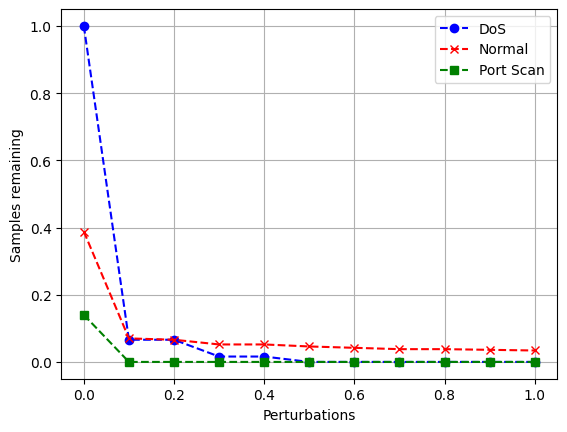

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt 

plt.clf()
x_axis = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
y_axis_dos = [1.0, 0.066, 0.066, 0.016, 0.016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 
y_axis_normal = [0.388, 0.07, 0.066, 0.052, 0.052, 0.046, 0.042, 0.038, 0.038, 0.036, 0.034] 
y_axis_ps = [ 0.14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

# Plot the first line
plt.plot(x_axis, y_axis_dos, label='DoS', color='blue', linestyle='--', marker='o')

# Plot the second line
plt.plot(x_axis, y_axis_normal, label='Normal', color='red', linestyle='--', marker='x')

# Plot the third line
plt.plot(x_axis, y_axis_ps, label='Port Scan', color='green', linestyle='--', marker='s')

# # Plot the fourth line
# plt.plot(x_axis, y_axis_infiltration, label='Infiltration', color='purple', linestyle='--', marker='p')

# # Plot the fifth line
# plt.plot(x_axis, y_axis_bot, label='Bot', color='orange', linestyle='--', marker='h')

# # Plot the sixth line
# plt.plot(x_axis, y_axis_web, label='Web Attack', color='magenta', linestyle='--', marker='+')

# # Plot the seventh line
# plt.plot(x_axis, y_axis_brute, label='Brute Force', color='cyan', linestyle='--', marker='_')

# Enable grid lines (both major and minor grids)
plt.grid()

# Customize grid lines (optional)
# plt.grid()

# Add labels and a legend
plt.xlabel('Perturbations')
plt.ylabel('Samples remaining')
plt.legend()

# Set the title of the plot
# plt.title('Accuracy x Features - SHAP SML')

# Show the plot
plt.show()
plt.savefig('GRAPH_PERT_SHAP_CIC.png')
plt.clf()